Model saved to /Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/iapr_group_50/project/kmeans_background_model.pkl
Cluster assignments:
L1000756.JPG: Cluster 2
L1000763.JPG: Cluster 2
L1000765.JPG: Cluster 2
L1000768.JPG: Cluster 2
L1000772.JPG: Cluster 2
L1000779.JPG: Cluster 2
L1000780.JPG: Cluster 2
L1000785.JPG: Cluster 2
L1000788.JPG: Cluster 2
L1000791.JPG: Cluster 2
L1000792.JPG: Cluster 2
L1000793.JPG: Cluster 2
L1000797.JPG: Cluster 2
L1000799.JPG: Cluster 2
L1000802.JPG: Cluster 2
L1000804.JPG: Cluster 2
L1000808.JPG: Cluster 5
L1000810.JPG: Cluster 2
L1000812.JPG: Cluster 2
L1000815.JPG: Cluster 2
L1000817.JPG: Cluster 0
L1000826.JPG: Cluster 5
L1000827.JPG: Cluster 5
L1000828.JPG: Cluster 0
L1000831.JPG: Cluster 5
L1000843.JPG: Cluster 5
L1000844.JPG: Cluster 2
L1000850.JPG: Cluster 0
L1000851.JPG: Cluster 2
L1000854.JPG: Cluster 2
L1000859.JPG: Cluster 1
L1000866.JPG: Cluster 3
L1000870.JPG: Cluster 4
L1000872.JPG: C

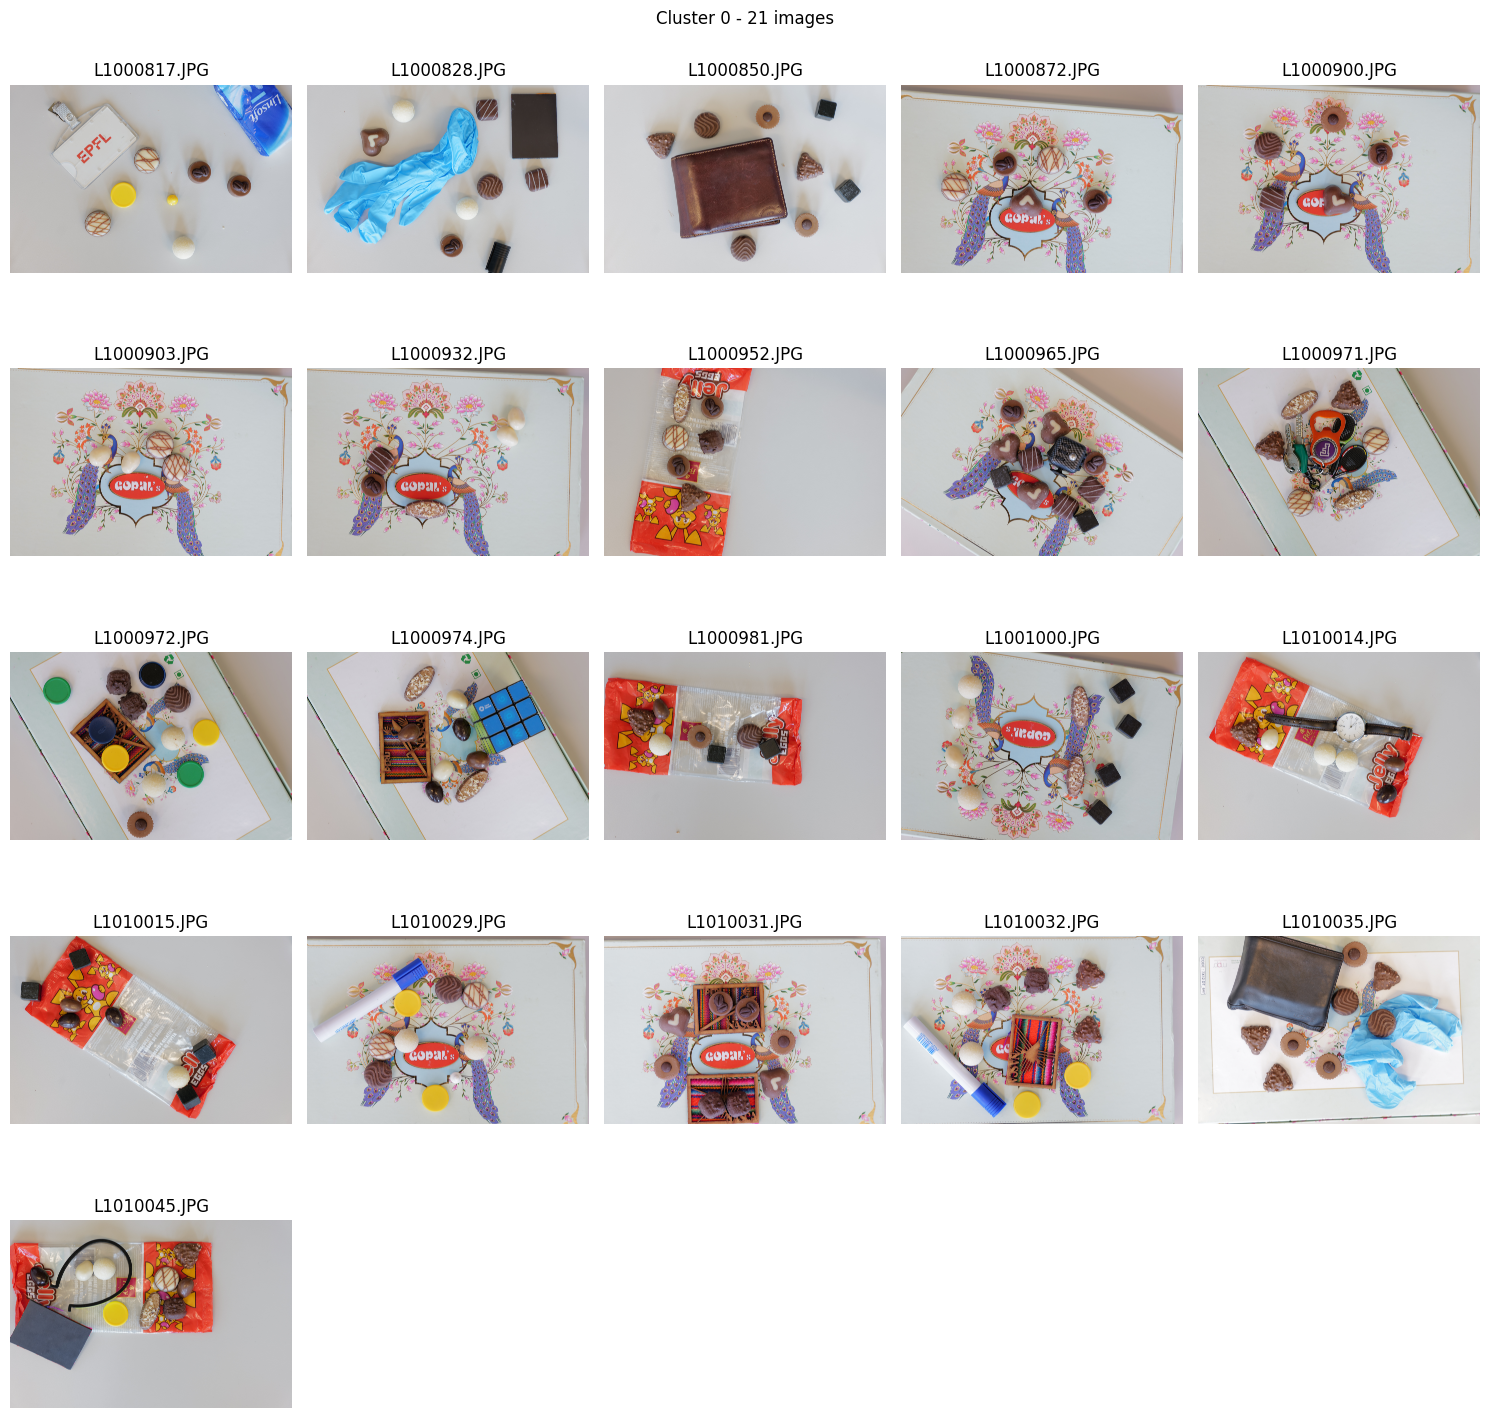

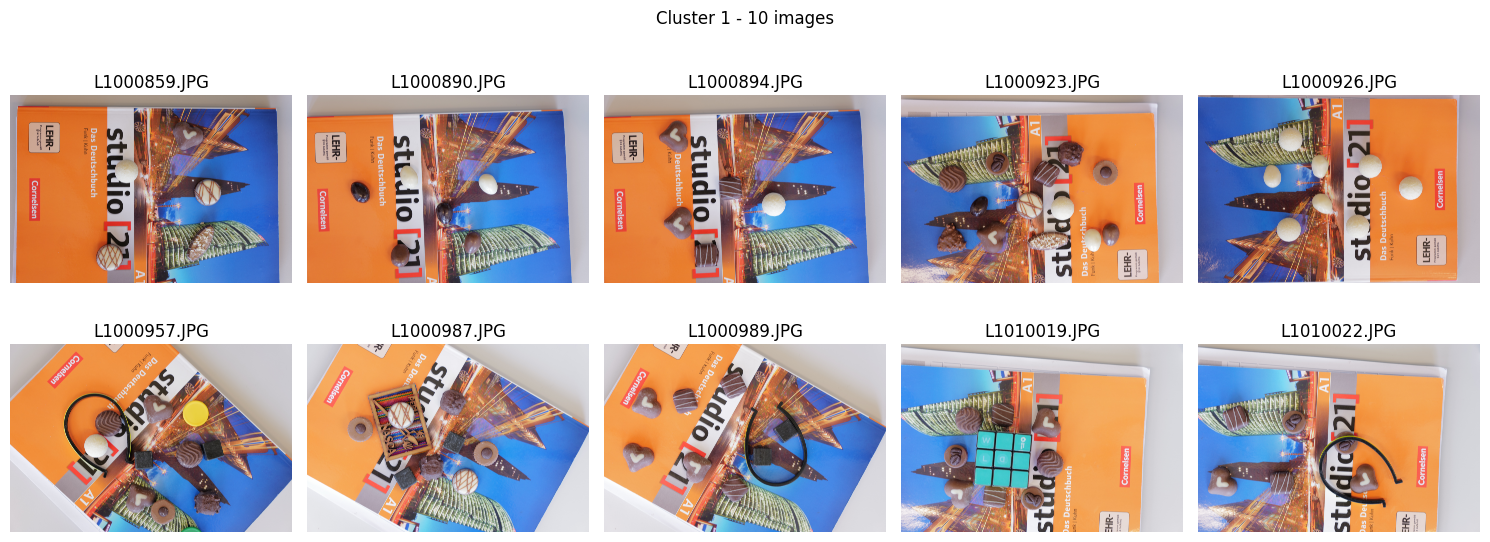

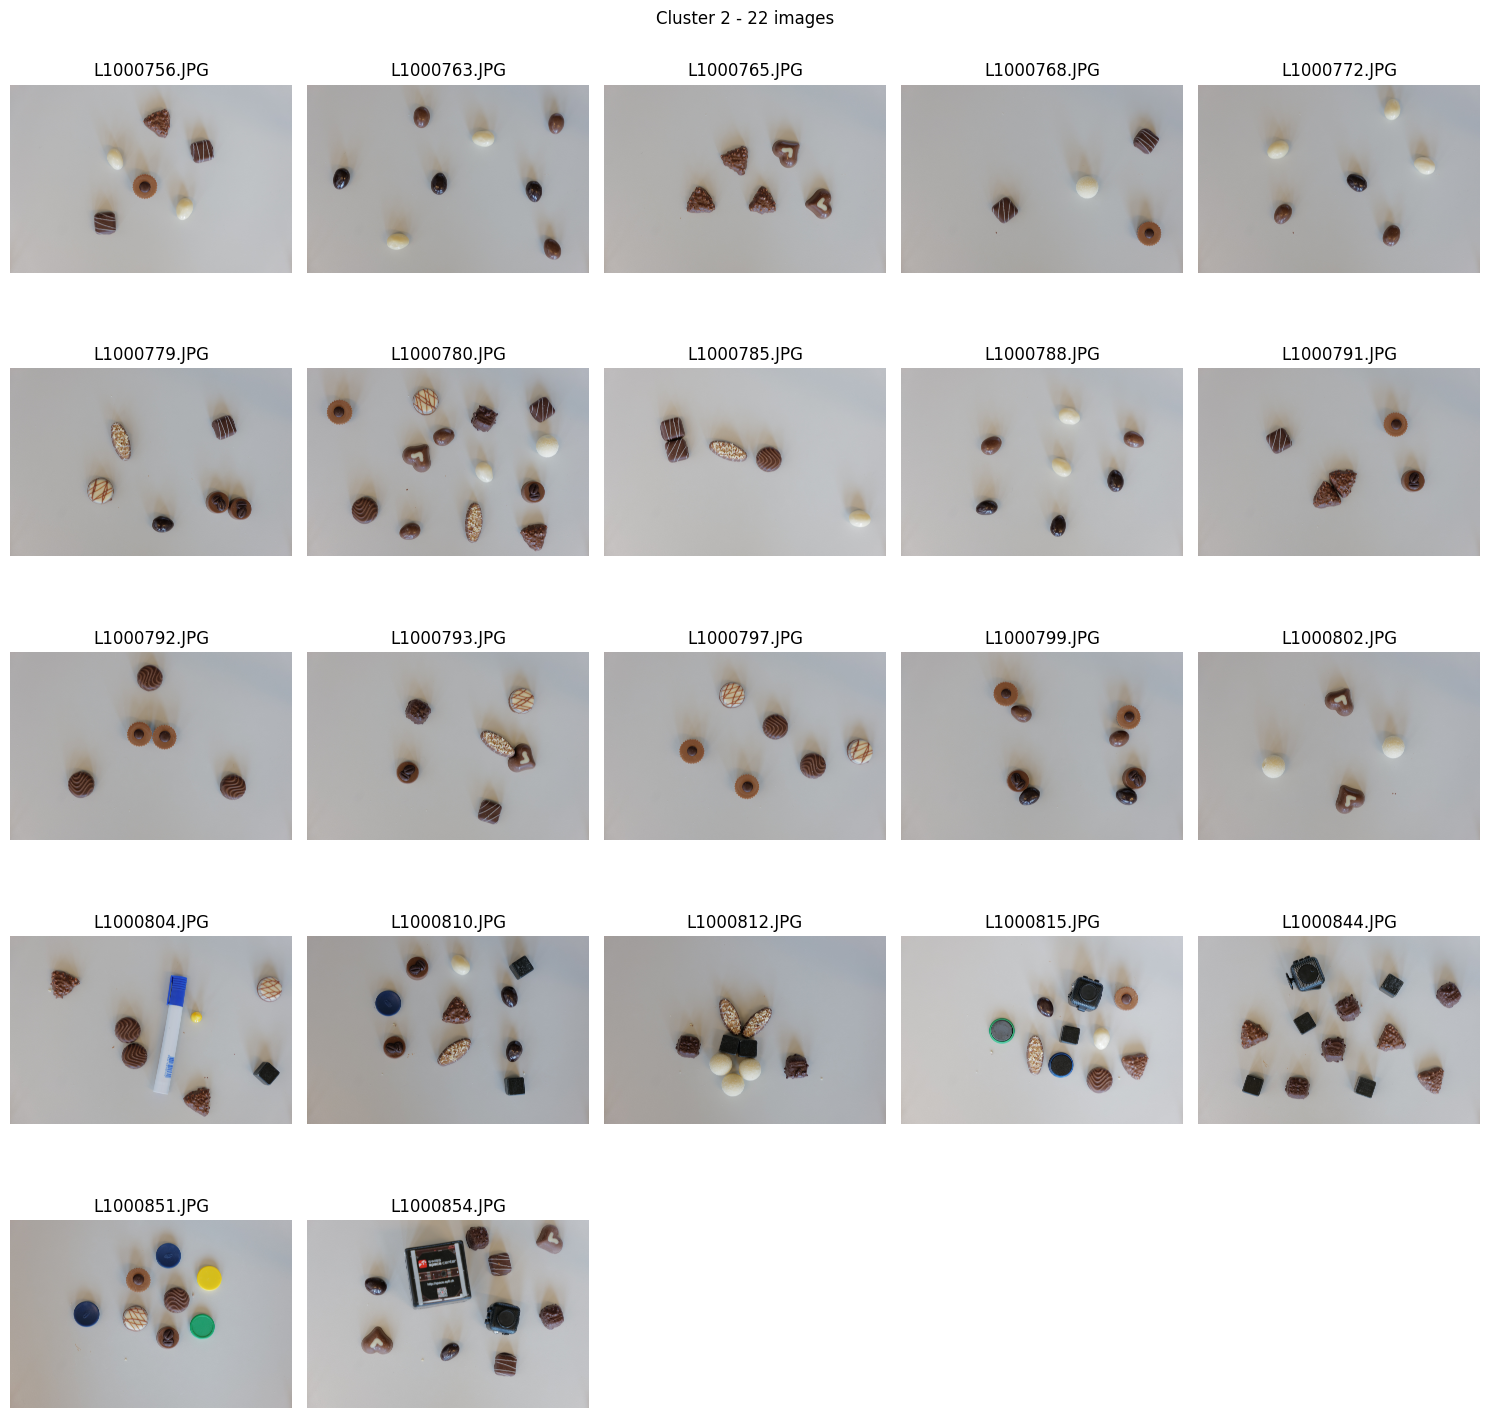

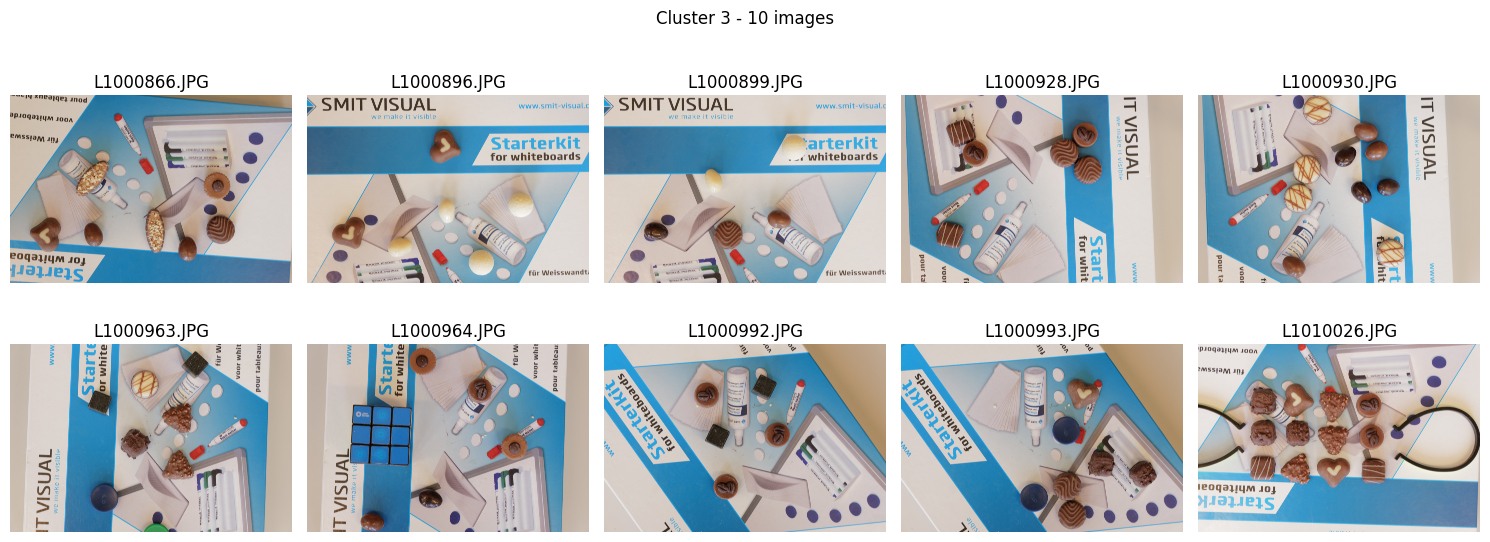

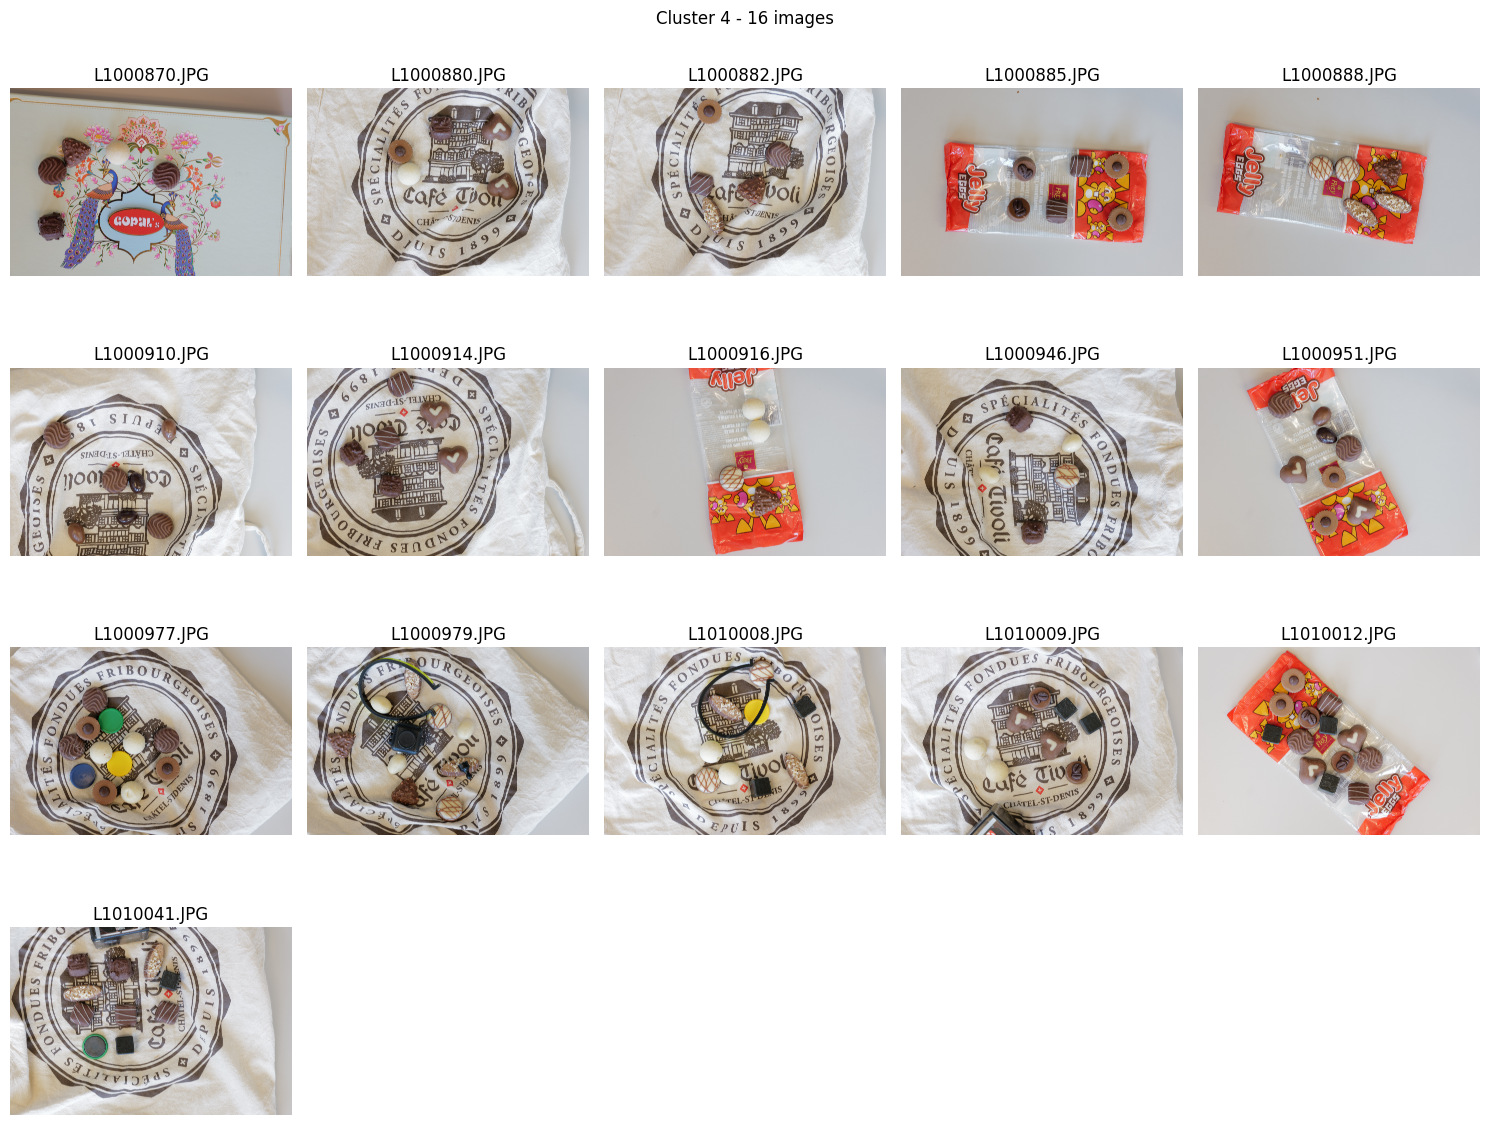

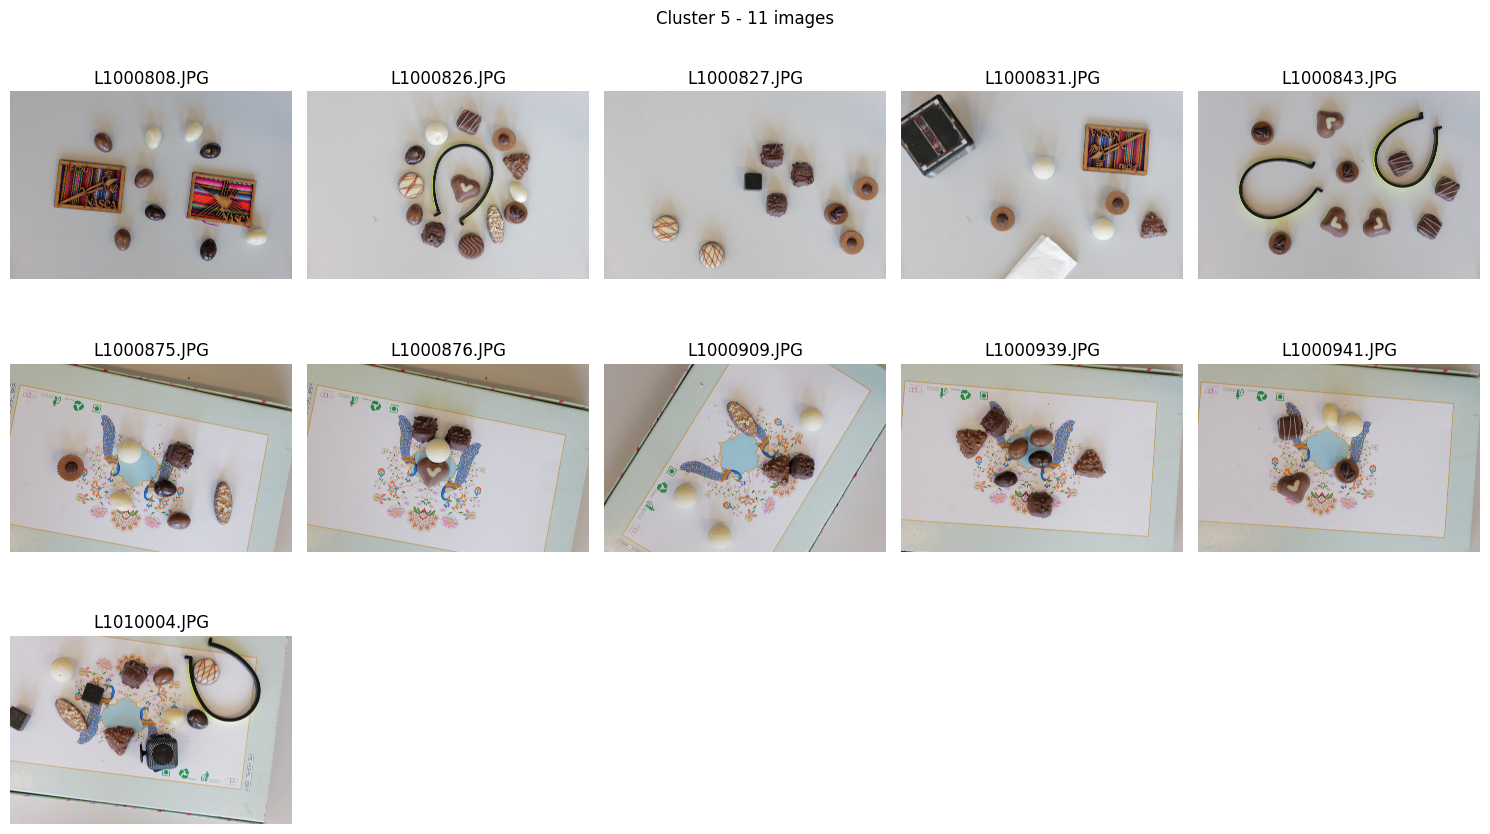

In [ ]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import joblib
import matplotlib.pyplot as plt

# --------------------------
# CONFIGURATION
# --------------------------
IMAGE_FOLDER = '/Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/dataset_project_iapr2025/train'  # Folder with training images
MODEL_PATH = '/Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/iapr_group_50/project/kmeans_background_model.pkl'
N_CLUSTERS = 6

# --------- Step 1: Load images as RGB arrays -----------
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(folder, filename)
            img_bgr = cv2.imread(path)
            if img_bgr is None:
                print(f"Warning: couldn't load {filename}")
                continue
            img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
            images.append(img_rgb)
            filenames.append(filename)
    return images, filenames

# --------- Step 2: Compute average HSV for each image -----------
def compute_average_hsv_from_rgb(image_rgb):
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    avg_hsv = np.mean(image_hsv, axis=(0, 1))
    return avg_hsv

def load_features_from_list(images_rgb_list):
    features = []
    for i, img_rgb in enumerate(images_rgb_list):
        if img_rgb is None or not isinstance(img_rgb, np.ndarray):
            print(f"Skipping invalid image at index {i}")
            continue
        avg_hsv = compute_average_hsv_from_rgb(img_rgb)
        features.append(avg_hsv)
    return np.array(features)

# --------- Step 3: Cluster images -----------
def cluster_images(features, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features)
    joblib.dump(kmeans, MODEL_PATH)
    print(f"Model saved to {MODEL_PATH}")
    return labels, kmeans.cluster_centers_

# --------- Step 4: Show all images in a cluster in a grid -----------
def show_cluster_images(images, filenames, labels, cluster_id, max_images=None):
    cluster_indices = [i for i, label in enumerate(labels) if label == cluster_id]
    if max_images:
        cluster_indices = cluster_indices[:max_images]
    cluster_images = [images[i] for i in cluster_indices]
    cluster_filenames = [filenames[i] for i in cluster_indices]

    n = len(cluster_images)
    if n == 0:
        print(f"No images in cluster {cluster_id}")
        return

    cols = min(n, 5)
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(cols * 3, rows * 3))
    for i, (img, fname) in enumerate(zip(cluster_images, cluster_filenames)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(fname)
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_id} - {n} images")
    plt.tight_layout()
    plt.show()

# --------- Main execution example -----------
if __name__ == "__main__":
    images, filenames = load_images_from_folder(IMAGE_FOLDER)
    features = load_features_from_list(images)
    labels, centers = cluster_images(features, n_clusters=N_CLUSTERS)

    print(f"Cluster assignments:")
    for fname, label in zip(filenames, labels):
        print(f"{fname}: Cluster {label}")

    # Show all images from each cluster
    for cluster_id in range(N_CLUSTERS):
        show_cluster_images(images, filenames, labels, cluster_id, max_images=None)  # max_images=None = show all


In [4]:
import csv

output_csv_path = "/Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/iapr_group_50/project/image_cluster_assignments.csv"  # Or full path if you prefer

with open(output_csv_path, mode="w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Filename", "Cluster"])
    for fname, label in zip(filenames, labels):
        writer.writerow([fname, label])

print(f"Cluster assignments saved to {output_csv_path}")


Cluster assignments saved to /Users/louiscuendet/Documents/EPFL NEURO-X /Semestre Printemps 2025/Image Analysis and Pattern Recognition/iapr_group_50/project/image_cluster_assignments.csv
